In [1]:
from context import qnetvo as qnet
from context import utilities
from context import network_ansatzes
import matplotlib.pyplot as plt
from pennylane import numpy as np

In /Users/brian/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/brian/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/brian/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/brian/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/brian/opt/anaconda3/lib/python3.7/

In [12]:
data_path = "../../script/data/ibm_ry_cnot_ry_chsh_opt_parameter_shift/"
simple_data_path = "../../script/data/ibm_belem_simple_chsh_opt_parameter_shift/"

data_files = utilities.get_data_files(data_path, r".*")
opt_dicts = [qnet.read_optimization_json(file) for file in data_files]
print("num parameter ry-cnot-ry optimizations : ", len(data_files))

simple_data_files = utilities.get_data_files(simple_data_path, r".*")
simple_opt_dicts = [qnet.read_optimization_json(file) for file in simple_data_files]
print("num parameter simple optimizations : ", len(simple_data_files))

num parameter ry-cnot-ry optimizations :  8
num parameter simple optimizations :  11


In [13]:
prep_nodes = [
    qnet.PrepareNode(1, [0, 1], network_ansatzes.ry_cnot, 2),
]
simple_prep_nodes = [
    qnet.PrepareNode(1, [0, 1], qnet.ghz_state, 0),
]
meas_nodes = [
    qnet.MeasureNode(2, 2, [0], qnet.local_RY, 1),
    qnet.MeasureNode(2, 2, [1], qnet.local_RY, 1),
]

chsh_ansatz = qnet.NetworkAnsatz(prep_nodes, meas_nodes)
simple_chsh_ansatz = qnet.NetworkAnsatz(simple_prep_nodes, meas_nodes)

chsh_cost = qnet.chsh_inequality_cost(chsh_ansatz)
simple_chsh_cost = qnet.chsh_inequality_cost(simple_chsh_ansatz)

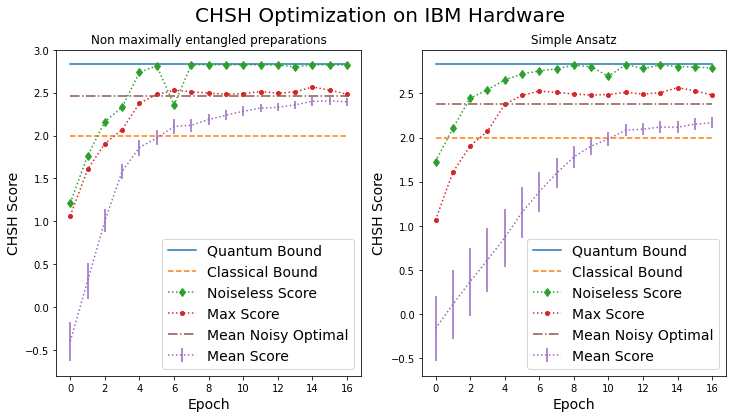

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
# yticks = [0.25,0.5,0.75,1,1.25,1.5]

num_samples = 17

data = utilities.opt_dicts_mean_stderr(opt_dicts, num_samples)
ideal_scores = [
    -(chsh_cost(data["opt_settings"][i])) for i in range(num_samples)
]

ax1.plot(range(num_samples), [2*np.sqrt(2)]*num_samples, "-", label="Quantum Bound")
ax1.plot(range(num_samples), [2]*num_samples, "--", label="Classical Bound")
ax1.plot(range(num_samples), ideal_scores, ":d", markersize=6, label="Noiseless Score")
ax1.plot(range(num_samples), data["max_scores"], ":.", markersize=8 , label="Max Score")
ax1.errorbar(
    range(num_samples),
    data["mean_scores"],
    data["stderr_scores"],
    linestyle=":",
    label="Mean Score"
)
ax1.plot(
    range(num_samples),
    [data["mean_theoretical_score"]] * num_samples,
    "-.",
    label="Mean Noisy Optimal"
)

# ax1.set_title("Parameter Gradient", size=16)
ax1.set_xlabel("Epoch", size=14)
ax1.set_ylabel("CHSH Score", size=14)
# ax1.set_yticks(yticks)
ax1.legend(loc="lower right", fontsize=14)
ax1.set_title("Non maximally entangled preparations")

simple_data = utilities.opt_dicts_mean_stderr(simple_opt_dicts, num_samples)
simple_ideal_scores = [
    -(simple_chsh_cost(simple_data["opt_settings"][i])) for i in range(num_samples)
]

ax2.plot(range(num_samples), [2*np.sqrt(2)]*num_samples, "-", label="Quantum Bound")
ax2.plot(range(num_samples), [2]*num_samples, "--", label="Classical Bound")
ax2.plot(range(num_samples), simple_ideal_scores, ":d", markersize=6, label="Noiseless Score")
ax2.plot(range(num_samples), data["max_scores"], ":.", markersize=8 , label="Max Score")
ax2.errorbar(
    range(num_samples),
    simple_data["mean_scores"],
    simple_data["stderr_scores"],
    linestyle=":",
    label="Mean Score"
)
ax2.plot(
    range(num_samples),
    [simple_data["mean_theoretical_score"]] * num_samples,
    "-.",
    label="Mean Noisy Optimal"
)

# ax1.set_title("Parameter Gradient", size=16)
ax2.set_xlabel("Epoch", size=14)
ax2.set_ylabel("CHSH Score", size=14)
# ax2.set_yticks(yticks)
ax2.legend(loc="lower right", fontsize=14)
ax2.set_title("Simple Ansatz")

fig.suptitle("CHSH Optimization on IBM Hardware\n", size=20)
plt.show()